![alt text](UVT.png)

# <center> A Risk Analysis Of The 5 Largest AEX Firms

## <center> Python Assignment MSc Economics: Applied Economic Analysis I 
## <center> 31-01-2019
|Name|examnr.|
|----|-------|
|Douwe de Wit|461933|

<a id=0></a>

# Table of contents 

1. [Introduction](#1)
2. [Data Cleaning](#2) 
3. [Visual Data Analysis](#3)
4. [Distribution Characteristics](#4)
5. [Tail Risk Estimations](#5)
6. [Monte Carlo Return Simulations](#6)
7. [Conclusion](#7)


<a id=1></a>
# 1. Introduction

The AEX-index is the most often used tool to estimate the performance of the top 25 most frequently traded firms in the Netherlands. According to the online financial broker website [lynx](https://www.lynx.nl/kennis/artikelen/5-grootste-beursgenoteerde-bedrijven-nederland/), this index is however often perceived as a poor estimate of overall corporate performance, as the top 5 noted companies comprise for around 55% of total firm value, thereby greatly influencing the closing AEX value. Therefore it is argued that the overall index does not necessarily reflect general market performance. According to their website, the following firms have the largest overall value, for which the first one is said to even account for 15% of the total AEX value: 

   1. Royal Dutch Shell 
   2. Unilever 
   3. ING Groep 
   4. Heineken 
   5. ASML 
    
Given the enormous share that these companies have in the index composition, it would be interesting to more deeply investigate their individual performances. More specifically, a large scale data analysis since the beginning of 2009 on daily risk and return could shed light on the financial health of these top rated AEX-corporations. By investigating the separate return distributions one can easily derive their return averages, spreads and negative risks. For this assignment I will most specifically look into the latter statistic, as it gives a good approximation of a firm's susceptibility to shocks, which could in turn provide helpful information for investors who wish to refrain from too risky financial projects. Lastly, based on the historic data set of stock returns, a Monte Carlo simulation will be performed, prediciting multiple future return paths per firm, from which we can obtain a 'perceived' level of future risk to negative shocks.

In sum, this programming assignment will seek to answer the following questions for the given set of companies: 

   1. Which company has performed best since the beginning of 2009 in terms of relative reward to risk? 
   2. Which company has, on average, experienced the largest negative shocks? 
   3. Based on a Monte Carlo simulations of daily stock returns, are these companies expected to have a higher level of negative risk relative to their historic paths? 

<a id=2></a>
# 2. Data Cleaning

Daily closing stock price data for all 5 companies are retrieved from [Yahoo Finance](https://finance.yahoo.com/) and saved in the working directory of this notebook. All data files are saved as 'csv-files', which I can easily upload into Python using the pandas package. In the two command boxes [below](#10) the other relevant packages are also installed, after which the data sets have been uploaded. As it can be seen [here](#33), the pandas information command says that the 'Date' column in all series is still perceived as an object, instead of as a date. This can be fixed by parsing the date column, thereby letting python know that this column solely consists of date times. The corresponding command and information output can be found [here](#11). 

It is for now the final goal to merge all five files together and save them as one pandas dataseries. However, in order to keep track of which closing stock value corresponds to which firm, it is first relevant to create an additional column under the name of the company itself for each current datafile, showing the daily closing stock prices, just as the 'Close' column is telling us right now. After the additional column has been added under the name of each company, all superfluous columns have been deleted. All that remains is the relevant closing stock price per day, for each firm separately, now nicely ordered into one pandas dataframe. This process is carried out in the three code boxes right [here](#12), where the third box shows the result of the merging process in a table. 

Finally, in order to examine stock return shocks, it is more convenient to look at daily percentage changes in stock value, rather than closing prices in euros. To retrieve this information, a new pandas dataframe is created ('returns'), using the previously constructed stockprices series. The head rows for the returns series is displayed [here](#13), but please keep in mind that these numbers must be read in percentage terms (i.e. times 100%). From the descriptive statistics in the second table, it becomes clear the average daily percentage returns are the highest for ASML (= 0.1043% simple average change), and the lowest for Royal Dutch Shell (= 0.02% simple average percentage change). Let us now further dive into the statistics in [section 3](#3). 

<a id=10></a>

In [3]:
# Retrieve all relevant packages for this assignment:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [4]:
# import the 5 datasets on daily stock prices since 1/1/2009 as a Pandas dataframe:
df1 = pd.read_csv('ASML.AS.csv')
df2 = pd.read_csv('HEIA.AS.csv')
df3 = pd.read_csv('INGA.AS.csv')
df4 = pd.read_csv('RDSA.AS.csv')
df5 = pd.read_csv('UNA.AS.csv')

<a id=33></a>

In [5]:
df1.info(); print(''); df2.info(); print(''); df3.info(); print(''); df4.info(); print(''); df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2576 entries, 0 to 2575
Data columns (total 7 columns):
Date         2576 non-null object
Open         2575 non-null float64
High         2575 non-null float64
Low          2575 non-null float64
Close        2575 non-null float64
Adj Close    2575 non-null float64
Volume       2575 non-null float64
dtypes: float64(6), object(1)
memory usage: 141.0+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2576 entries, 0 to 2575
Data columns (total 7 columns):
Date         2576 non-null object
Open         2576 non-null float64
High         2576 non-null float64
Low          2576 non-null float64
Close        2576 non-null float64
Adj Close    2576 non-null float64
Volume       2576 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 141.0+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2576 entries, 0 to 2575
Data columns (total 7 columns):
Date         2576 non-null object
Open         2576 non-null float64
High   

<a id=11></a>

In [6]:
# Reread the files, however now correctly indicating the dtype of the date column: 

ASML = pd.read_csv('ASML.AS.csv', parse_dates=['Date'])
HEIN = pd.read_csv('HEIA.AS.csv', parse_dates=['Date'])
ING = pd.read_csv('INGA.AS.csv', parse_dates=['Date'])
RDS = pd.read_csv('RDSA.AS.csv', parse_dates=['Date'])
UNI = pd.read_csv('UNA.AS.csv', parse_dates=['Date'])

In [7]:
# Check if 'Date' column is now indeed perceived as a date-type, which it is (taking ASML as one example). 
ASML.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2576 entries, 0 to 2575
Data columns (total 7 columns):
Date         2576 non-null datetime64[ns]
Open         2575 non-null float64
High         2575 non-null float64
Low          2575 non-null float64
Close        2575 non-null float64
Adj Close    2575 non-null float64
Volume       2575 non-null float64
dtypes: datetime64[ns](1), float64(6)
memory usage: 141.0 KB


<a id=12></a>

In [8]:
# Restructure the columns by adding the closed stock prices as an extra column, under the stock's own name:
ASML['ASML'] = ASML['Close']

HEIN['HEIN'] = HEIN['Close']

ING['ING'] = ING['Close']

RDS['RDS'] = RDS['Close']

UNI['UNI'] = UNI['Close']

In [9]:
# Drop the irrelevant columns: 
ASML = ASML.drop(columns=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'])
HEIN = HEIN.drop(columns=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'])
ING = ING.drop(columns=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'])
RDS = RDS.drop(columns=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'])
UNI = UNI.drop(columns=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'])

In [10]:
# Combine all pandas dataframes into one file by merging; performing a subsequent pairwise merging of data series.
# In order to keep a simple overview, I refrain from merging all 5 dataframes in one line of code.

merge_1 = pd.merge(ASML, HEIN, on = 'Date')
merge_2 = pd.merge(merge_1, ING, on = 'Date')
merge_3 = pd.merge(merge_2, RDS, on = 'Date')
merge_4 = pd.merge(merge_3, UNI, on = 'Date')

# Set the index to the Date column: 
stockprices = merge_4.set_index('Date')

#Check the final result:

print(stockprices.head())
print('')
print(stockprices.tail())

                 ASML       HEIN      ING        RDS        UNI
Date                                                           
2009-01-02  16.636400  22.450001  5.83587  19.684999  17.990000
2009-01-05  17.298700  22.799999  5.82052  20.080000  18.000000
2009-01-06  17.727301  23.510000  6.25437  20.570000  18.014999
2009-01-07  16.954500  23.830000  6.22749  20.070000  17.650000
2009-01-08  16.688299  24.215000  6.08159  20.280001  17.740000

                  ASML       HEIN     ING        RDS        UNI
Date                                                           
2019-01-21  143.539993  75.959999  10.388  26.910000  46.814999
2019-01-22  141.360001  76.000000  10.372  26.360001  46.689999
2019-01-23  142.619995  76.199997  10.446  25.924999  47.169998
2019-01-24  148.800003  76.400002  10.334  26.059999  46.970001
2019-01-25  154.440002  75.739998  10.644  26.010000  46.799999


<a id=13></a>

In [11]:
# Obtain daily percentage returns in a new pandas dataseries.

# Create a new dataframe (returns), without the stock prices, but now with percentage returns:

returns = stockprices.drop(columns=['ASML', 'HEIN', 'ING', 'RDS', 'UNI'])
returns['ASML(%)'] = stockprices['ASML'].pct_change()
returns['HEIN(%)'] = stockprices['HEIN'].pct_change()
returns['ING(%)'] = stockprices['ING'].pct_change()
returns['RDS(%)'] = stockprices['RDS'].pct_change()
returns['UNI(%)'] = stockprices['UNI'].pct_change()

# drop the first row which has only NaN
returns = returns.dropna(axis=0, how='all')

# Check the result: 

print(returns.head())
print('')
print('')

# And check the overall daily return statistics: 

print(returns.describe())

             ASML(%)   HEIN(%)    ING(%)    RDS(%)    UNI(%)
Date                                                        
2009-01-05  0.039810  0.015590 -0.002630  0.020066  0.000556
2009-01-06  0.024776  0.031140  0.074538  0.024402  0.000833
2009-01-07 -0.043594  0.013611 -0.004298 -0.024307 -0.020261
2009-01-08 -0.015701  0.016156 -0.023428  0.010463  0.005099
2009-01-09 -0.018678 -0.012802  0.073232 -0.003452 -0.001127


           ASML(%)      HEIN(%)       ING(%)       RDS(%)       UNI(%)
count  2575.000000  2575.000000  2575.000000  2575.000000  2575.000000
mean      0.001043     0.000556     0.000631     0.000200     0.000449
std       0.018819     0.012926     0.028297     0.013510     0.012466
min      -0.207988    -0.076371    -0.182813    -0.077186    -0.063055
25%      -0.009190    -0.006153    -0.011910    -0.006444    -0.006042
50%       0.000844     0.000461     0.000316     0.000387     0.000238
75%       0.011354     0.007362     0.012580     0.007137     0.007000
max

<a id=3></a>
# 3. Visual Data Analysis

Now that the dataset has been properly cleaned and structured, we can start looking at some more detailed statistics and visualisations. From now on the 'returns' pandas series will be the main dataset of interest. 

First, python allows us to easily create a comparative figure including 5 subplots of daily percentage return changes since the beginning of 2009 for each firm separately. From [this graph](#14) directly below, some interesting trends become immediately visible. Overall it seems pretty clear that ING Group portrays the most fluctuous trends, in both positive and negative sense. However, also the returns for ASML are relatively unstable compared to the remaining three firms (ignoring extreme outliers, such as for Unilever in the beginning of 2017). Yet still, without better information on the corresponding rewards that are attached to these larger fluctuations, it is still hard to make any claims on the degree of reward-to-risk. 

To come to the degree of annualized reward-to-risk ratio, it is first necessary to compute the annualized mean and volatility of returns. To get to this value, we need the average daily returns and volatility, which can be computed using the corresponding numpy commands as is explained in [this](#15) command box. The daily returns can be annualized using the formula: 

<center> \\(\mu_{annualized} = (1 + \mu_{daily})^{252}-1\\)
    
Furthermore, the annualized volatility is calculated as the daily volatility times the square root of the amount of business days in a year: 

<center> \\(\sigma_{annualized} = \sigma_{daily}*\sqrt{252}\\)
    
Also [here](#15), the descriptive annualized descriptives have been tabulated, showing the different annualized reward to risk ratios, which have been computed by dividing the annualized average return, over the annualized volatility. From the data it becomes clear that ASML has the highest rewards compared to the riskiness of their returns (Ratio = 1.006), whilst for Royal Dutch Shell the ratio is the poorest (Ratio = 0.241). Therefore, based on the relative statistics, a rational investor maximizing his/here reward-to-risk premium should invest in the ASML stocks (out of these 5 firms). Please also have a look at the [bar plots](#16) that graphically capture the relative ratios. This answers the first question as is stated in the [introduction](#1). Yet one should be careful drawing too many conclusions from these type of statistics. Even though they give some salient information in the relative risk distributions across firms, it does not tell anything about the potential negative shocks that the returns have, due to the averaged character of the ratio. To get more information on the potential extreme risk, it is therefore relevant to look at the distribution of returns, and from there onwards calculate the tail risk per firm. I continue doing this in [section 4](#4)

<a id=14></a>

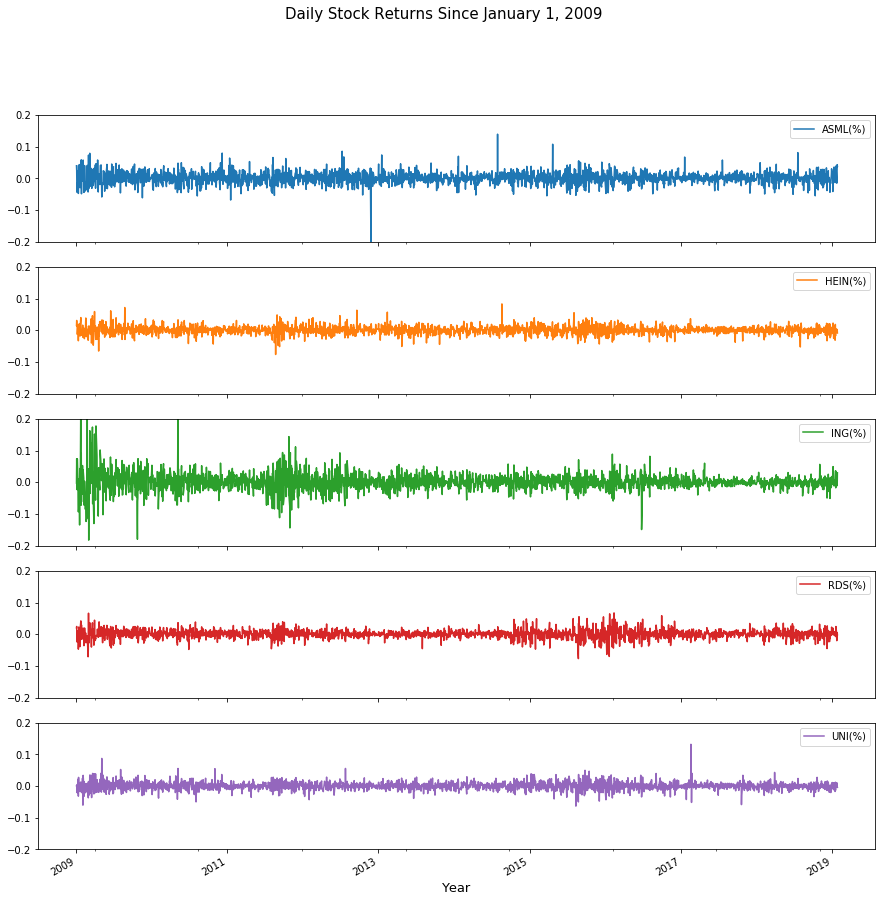

In [12]:
# Show the historic daily percentage returns for all 5 firms separately:

returns.plot(subplots=True, figsize = [15,15], sharey=True)
plt.suptitle('Daily Stock Returns Since January 1, 2009', fontsize=15)
plt.xlabel('Year', fontsize=13)

# For the best comparison, make sure the the y-axis has the same range for all subplots: 

plt.ylim(-0.2, 0.2)
plt.show()

<a id=15></a>

In [21]:
# In order to graphically compare annualized statistics, I first calculate the annualized return mean and stanard deviation:

# annualized returns:

avg_ret_daily = np.mean(returns)
avg_ret_annual = ((1+avg_ret_daily)**252)-1

# Annualized volatility (standard deviation):

returns_vol_daily = np.std(returns)
returns_vol_annualized = returns_vol_daily * np.sqrt(252)

# Create a list of both annualized returns and volatilities, so that I can convert it into pandas dataframe together:

statistics = [avg_ret_annual, returns_vol_annualized]

descriptives_annualized = pd.DataFrame(statistics)

descriptives_annualized.loc['risk-return'] = descriptives_annualized.iloc[0]/descriptives_annualized.iloc[1]

# Improve the row labels and show the result: 
return_stats = descriptives_annualized.rename({0:'$\mu$', 1:"$\sigma$"})
return_stats

,ASML(%),HEIN(%),ING(%),RDS(%),UNI(%)
$\mu$,0.300528,0.150292,0.172180,0.051575,0.119686
$\sigma$,0.298679,0.205149,0.449113,0.214425,0.197861
risk-return,1.006190,0.732600,0.383376,0.240528,0.604902


<a id=16></a>

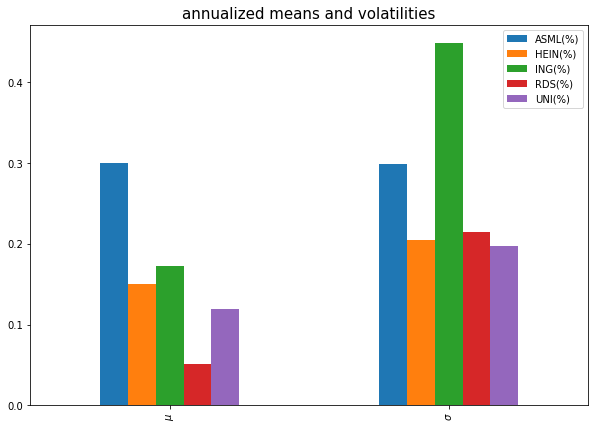

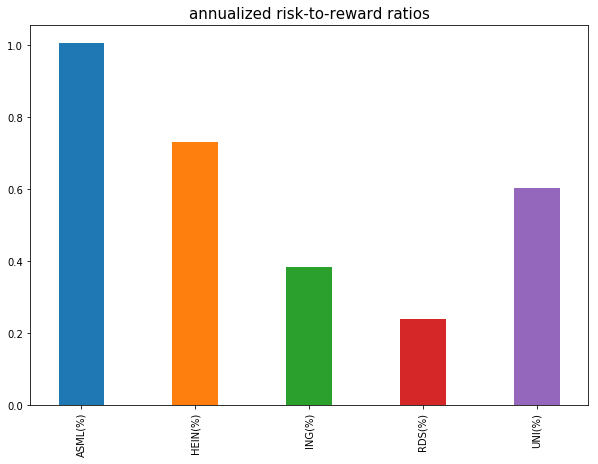

In [22]:
# Graphically compare the table above: 

scale =[10, 7]
barwidth = 0.4

# Select the first two rows for the first plot (i.e. annualized mean and volatility): 

return_stats.iloc[0:2].plot.bar(figsize=scale)
plt.title('annualized means and volatilities', fontsize=15)
plt.show()

# Only look at the return-to-risk ratio in the second plot: 

return_stats.iloc[2].plot.bar(figsize=scale, width=barwidth)
plt.title('annualized risk-to-reward ratios', fontsize=15)
plt.show()

<a id=4></a>
# 4. Distribution Characteristics

Before it is possible to estimate the extent of negative shocks per firm, it is necessary to look at the type of distribution that each return series has. Generally, stock returns tend to be normally distributed, however we first need to test for this with a Shapiro-Wilk test of normality. For this test I have imported the 'stats' from the scipy package (as was done [here](#10)). The process of this normality check is further explained in the command box [below](#17), where the final conclusion is that all returns are normally distributed. 

The visual representation of the returns in terms of a histogram also confirm this conclusion, as they all 5 approach a 'bell shaped distribution', as can be seen in the [5 subplots](#18). From these graphs it can be seen that ING Groep has the longest 'tails', indicating a larger susceptibility to (postivive and negative) shocks relative to the other 5 firms. From this we can hypothesise that the estimated tail risk will be the largest for this firm. Let us have a look at these value at risk statistics in [section 5](#5)

<a id=17></a>

In [15]:
# We have now looked at a first risk-to-reward comparison between the five stocks. Let us now look at a second measure: VaR(95)
# First we need to see if the daily returns are normally distributed

# Create an empty list in which I can store all 5 p-values from the separate test. 

p_values = []

# The stats.shapiro commands produces a list of output, where the second element is the p-value. Slice this value out using [1]:

p1 = stats.shapiro(returns['ASML(%)'])[1]
p_values.append(p1) 

p2 = stats.shapiro(returns['HEIN(%)'])[1]
p_values.append(p2)

p3 = stats.shapiro(returns['ING(%)'])[1]
p_values.append(p3)

p4 = stats.shapiro(returns['RDS(%)'])[1]
p_values.append(p4)

p5 = stats.shapiro(returns['UNI(%)'])[1]
p_values.append(p5)

# Transform the list into a numpy array such that we can check for significance for all p-values simultaneously. 

p_values_array = np.array(p_values)

if p_values_array.all() <= 0.05:
    print('All returns are not normally distributed')
else:
    print('All returns have a normal distribution')

All returns have a normal distribution


<a id=18></a>

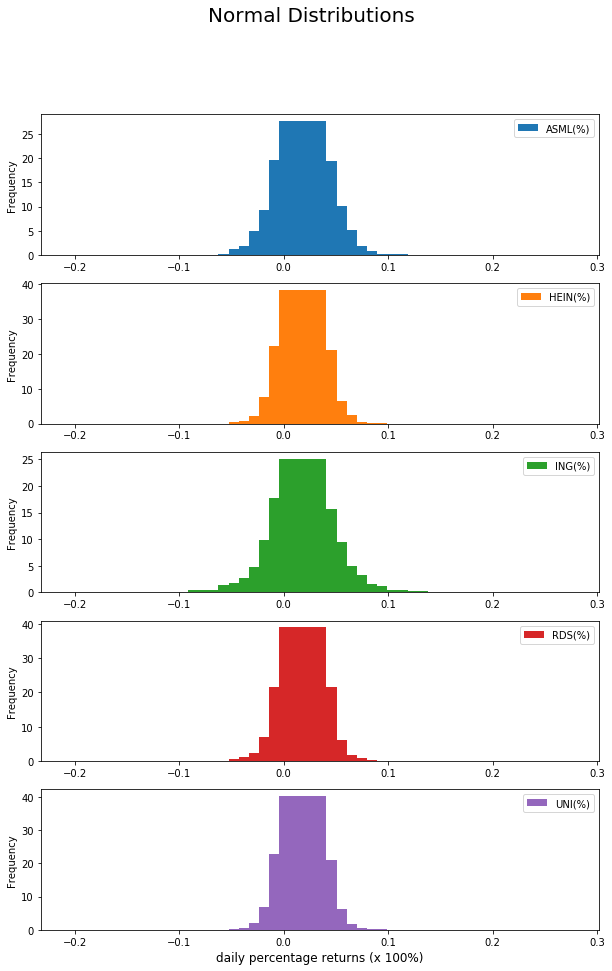

In [16]:
returns.iloc[: :].plot.hist(subplots=True, figsize=[10,15], width=0.045, bins=50, normed=1, sharex=False)
plt.xlabel('daily percentage returns (x 100%)', fontsize=12)
plt.suptitle('Normal Distributions', fontsize=20)
plt.show()


<a id=5></a>
# 5. Tail Risk Estimations

Since all returns follow a normal distributions, it is possible to estimate the average percentage daily loss in the 'worst case scenario'. This can be captured with the "95% value at risk" statistic, which measures the minimum loss in 5% of the worst cases. Using the '.percentile' function from the numpy package, as is done [here](#19), python computes these minimum loss values for us. Yet we can go one step further, by slicing all return values per firm for which the return is equal or lower than the boundary return of the 95% value at risk. By taking the average of all these observations, I can compute the average loss (as opposed to the minimum loss that is captured by the VAR(95%)), in the 5% worst case scenarios. This is the average tail risk, a variable that nicely sheds light on a firm's historic exposure to negative shocks. 

Note that Python is an ideal tool to analyze the tail risk of stock returns, as it is great for sensitivity analysis. The parameter "var_level" can easily by changed to for instance 99 or 99.9 to determine more extreme levels of tail risk. Yet for now we will stick to the 5% tail risk (i.e. \\(var_{level} = 95\\)). 

All average 5% tail risk values are stored in the empty list 'tailrisk', which is subsequently zipped into one dictionary together with the company names as keys. This allows us to easily sort the average tail risk values with the corresponding key (i.e. company name), to immediately see the order of susceptibility to negative shocks. 

Finally, I have defined a function at the bottom of this [command box](#19), which simply tells us which key corresponds to the value with the lowest number (i.e. has the largest tail risk). Python tells us in the output that ING Groep is the firm with the largest average 5% tail risk of 6.5153%, just as was hypothesised based on the normal distribution plots. Furthermore, it orders the firms by tailrisk values, indicating that Unilever on average has the lowest negative shock in 5% of all daily returns since 2009. 

This kind of information is essential for investors who cannot bear too large losses, because they for instance need a constant cashflow and are therefore not willing to deal with too large negative shocks. For such an investor it would be wiser to invest in a firm with lower average tail risk. 

This analysis of tailrisk has given some insights in question 2 as was stated in the [introduction](#1). Now all that remains for this assignment, is an attempt to simulate a random path of future daily returns for each company and see to what extent these future values have a higher or lower level of minimum tailrisk compared to previously computed historical levels. For this I refer to [section 6](#6)

<a id=19></a>

In [17]:
# Calculate the value at risk at the 5% level for all firms, in order to see the minimum loss in the worst 5% of the cases.

var_level = 95

# Eventually I want to create a dictionary with company names as the keys, and average VAR(95) as the values.
# Create an empty list for the latter, in which we will store the values later. 

names = ['ASML', 'HEIN', 'ING', 'RDS', 'UNI']
tailrisk = []

# Construct the mininum 5% tail risk:

var95_ASML = np.percentile(returns['ASML(%)'], 100-var_level)
var95_HEIN = np.percentile(returns['HEIN(%)'], 100-var_level)
var95_ING = np.percentile(returns['ING(%)'], 100-var_level)
var95_RDS = np.percentile(returns['RDS(%)'], 100-var_level)
var95_UNI = np.percentile(returns['UNI(%)'], 100-var_level)

# To get the average daily percentage loss, I must take the average of all the 5% worst returns and save it in 'tailrisk':

avg_var95_ASML = round(returns['ASML(%)'][returns['ASML(%)']<=var95_ASML].mean(), 6) * 100
tailrisk.append(avg_var95_ASML)

avg_var95_HEIN = round(returns['HEIN(%)'][returns['HEIN(%)']<=var95_HEIN].mean(), 6) * 100
tailrisk.append(avg_var95_HEIN)

avg_var95_ING = round(returns['ING(%)'][returns['ING(%)']<=var95_ING].mean(), 6) * 100
tailrisk.append(avg_var95_ING)

avg_var95_RDS = round(returns['RDS(%)'][returns['RDS(%)']<=var95_RDS].mean(), 5) * 100
tailrisk.append(avg_var95_RDS)

avg_var95_UNI = round(returns['UNI(%)'][returns['UNI(%)']<=var95_UNI].mean(), 4) * 100
tailrisk.append(avg_var95_UNI)

# Combine the two lists into one dictionary to get an overview of the ordinal distribution of the 5 firms.

tailrisk_names = dict(zip(names, tailrisk))

# Sort the values with the corresponding keys from high risk to low risk:

tailrisk_sorted = sorted(tailrisk_names.items(), key=lambda x: x[1])

# Define the a function for the company with the largest average tail risk. 

def largestrisk(tailrisk_names):
     value=list(tailrisk_names.values())
     key=list(tailrisk_names.keys())
     return key[value.index(min(value))]

# And let Python tell us which company has on average the largest losses in 5% of the worst scenarios:

print(largestrisk(tailrisk_names) + ' is the company with the largest daily average VAR(95), which means that, on average, they incur a loss of ' + str(round(min(tailrisk_names.values()),6)) + ' %, in 5% of the worst cases.')
print('')
print('Overall,  based on the  average 5% tail risk statistics, the companies are ordered in the following way from higher to lower   risk:') 
print('')

# See how the other firms are ordered, by printing the ordered dictionary: 
print(tailrisk_sorted)

ING is the company with the largest daily average VAR(95), which means that, on average, they incur a loss of -6.5153 %, in 5% of the worst cases.

Overall,  based on the  average 5% tail risk statistics, the companies are ordered in the following way from higher to lower   risk:

[('ING', -6.5153), ('ASML', -4.0205), ('RDS', -3.26), ('HEIN', -2.8723), ('UNI', -2.73)]


<a id=6></a>
# 6. Monte Carlo Return Simulations

Python is an ideal tool to program a random path based on historical variables, by creating a loop that repeats itself for a predetermined amount of times. It would be interesting to simulate the percentage returns for the next 252 business days (i.e. all daily returns for the next year), using a the Monte Carlo Simulation Method. This method basically entails that a certain loop is repeated to portray a large set of potential outcomes. This is can be thought of as a large set of random walks, that together give some insight in the future walk of a certain variable. As it was mentioned before, this simulation is based on historical returns, for which we need the mean and standard deviation in order to start the simulation. On top of that, we must set the amount of times that the loop must be repeated to 252, such that we randomly stipulate a future path for 1 business year. 

As can be seen in the command box [below](#22), this simulation is carried out 5 times for each firm separately. However in order to keep things simple, explanatory notes are only provided for the first simulation, as the remaining 4 are identical in the process. 

The output shows a very interesting outcome, namely that for all five firms, the simulated paths have higher minimum tail risks, indicating that the future will have slightly larger negative shocks, based on the historical returns. However please note that these findings are very far from definitive, as they are first of all randomly simulated; and secondly because they are based on simple daily historical returns, which never guarantee future outcomes. It is therefore very important not to put too much weight on these conclusions. Yet they are still intersting, as they give some indication: 

For instance, the predicted daily var(95) for ING Groep tends to show a larger discrepency relative to their own historically computed var(95), compared to the other 5 firms. Hence based on these simulations, ING Groep seems to be susceptible to the largest level of increasing tail risk. Furthermore, in spite of relative differences, all companies show to have higher tail risks compared to their hisorical values, which approaches an answer to the third question of the [introduction](#1). Please also note here that the privisionary VAR(95) levels are randomly simulated, and therefore different every time you run the command. However, when executing the simulation over and over again, the simulated tail risk levels almost always seem to exceed the historically predicted levels of tail risk, for all firms. 

Lastly, the [final figure](#23) of this assignment plots all the simulated random paths for ASML. Evidently this figure does not yield any concrete information on value statistics, yet it perhaps aids to better understand what a Monte Carlo Simulation actually does. The overall findings and conclusions shall now be summarized in the conclusive [section 7](#7)

<a id=22></a>

In [18]:
#1 Monte Carlo Simulation ASML

# Retrieve the daily mean and volatility for ASML and save it in a new variable.

mu_asml = np.mean(returns['ASML(%)'])
sigma_asml = np.std(returns['ASML(%)'])
T = 252

# Create a new list in which I can store the simulated returns.

mc_sim_asml = []

# Loop the simulation T times (i.e. for 252 business days) and store the result in the empty list. 

for i in range (252):
    
    fct_returns_asml = np.random.normal(mu_asml, sigma_asml, T)
    mc_sim_asml.append(fct_returns_asml)

print('')
print('ASML:')
print('')
print('Historic daily VAR(95) = ' + str(round(var95_ASML, 10)*100) + ' %')

# As was done before in section 5, estimate the minimum 5% tail risk, now using the simulated returns: 

print('Predicted daily VAR(95) = ' + str(round(np.percentile(mc_sim_asml, 100-var_level),10)*100) + ' %')


# Repeat the process for the remaining companies:


#2 Monte Carlo Simulation HEINEKEN

mu_hein = np.mean(returns['HEIN(%)'])
sigma_hein = np.std(returns['HEIN(%)'])
T = 252

mc_sim_hein = []

for i in range (252):
    
    fct_returns_hein= np.random.normal(mu_hein, sigma_hein, T)
    mc_sim_hein.append(fct_returns_hein)


print('')
print('HEINEKEN:')
print('')
print('Historic daily VAR(95) = ' + str(round(var95_HEIN, 10)*100) + ' %')
print('Predicted daily VAR(95) = ' + str(round(np.percentile(mc_sim_hein, 100-var_level),10)*100) + ' %')

#3 Monte Carlo Simulation ING Groep

mu_ing = np.mean(returns['ING(%)'])
sigma_ing = np.std(returns['ING(%)'])
T = 252

mc_sim_ing = []

for i in range (252):
    
    fct_returns_ing = np.random.normal(mu_ing, sigma_ing, T)
    mc_sim_ing.append(fct_returns_ing)

print('')
print('ING:')
print('')
print('Historic daily VAR(95) = ' + str(round(var95_ING, 10)*100) + ' %')
print('Predicted daily VAR(95) = ' + str(round(np.percentile(mc_sim_ing, 100-var_level),10)*100) + ' %')

#4 Monte Carlo Simulation Royal Dutch Shell

mu_rds = np.mean(returns['RDS(%)'])
sigma_rds = np.std(returns['RDS(%)'])
T = 252

mc_sim_rds = []

for i in range (252):
    
    fct_returns_rds = np.random.normal(mu_rds, sigma_rds, T)
    mc_sim_rds.append(fct_returns_rds)


print('')
print('ROYAL DUTCH SHELL:')
print('')
print('Historic daily VAR(95) = ' + str(round(var95_RDS, 10)*100) + ' %')
print('Predicted daily VAR(95) = ' + str(round(np.percentile(mc_sim_rds, 100-var_level),10)*100) + ' %')

#5 Monte Carlo Simulation UNILEVER

mu_uni = np.mean(returns['UNI(%)'])
sigma_uni = np.std(returns['UNI(%)'])
T = 252

mc_sim_uni = []

for i in range (252):
    
    fct_returns_uni = np.random.normal(mu_uni, sigma_uni, T)
    mc_sim_uni.append(fct_returns_uni)


print('')
print('UNILEVER:')
print('')
print('Historic daily VAR(95) = ' + str(round(var95_UNI, 10)*100) + ' %')
print('Predicted daily VAR(95) = ' + str(round(np.percentile(mc_sim_uni, 100-var_level),10)*100) + ' %')


ASML:

Historic daily VAR(95) = -2.93412471 %
Predicted daily VAR(95) = -2.98028437 %

HEINEKEN:

Historic daily VAR(95) = -2.00025275 %
Predicted daily VAR(95) = -2.0595961199999997 %

ING:

Historic daily VAR(95) = -4.11197309 %
Predicted daily VAR(95) = -4.60975892 %

ROYAL DUTCH SHELL:

Historic daily VAR(95) = -2.18758251 %
Predicted daily VAR(95) = -2.18930182 %

UNILEVER:

Historic daily VAR(95) = -1.90059591 %
Predicted daily VAR(95) = -2.00085586 %


<a id=23></a>

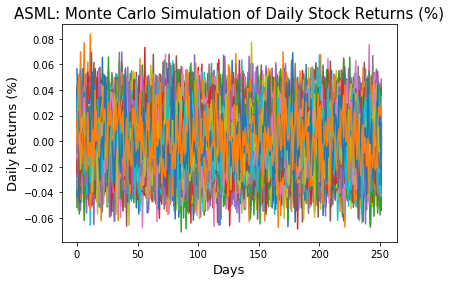

In [19]:
# Plot the simulated paths for ASML, to illustrate graphically what a Monte Carlo Simulation actually does:

plt.plot(range(0,T), mc_sim_asml)
plt.title('ASML: Monte Carlo Simulation of Daily Stock Returns (%)', fontsize=15)
plt.ylabel('Daily Returns (%)', fontsize = 13)
plt.xlabel('Days', fontsize = 13)
plt.show()

<a id=7></a>
# 7. Conclusion 

This assignment has first of all attempted to shed light on the historical risk and reward distributions for the 5 largest AEX registred firms. Provided was a series of 5 data sets starting on January 1, 2009, for the firms of ASML, Heineken, ING groep, Royal Dutch Shell and Unilever. It was first of all shown how the programming tools that Python offers can easily be applied to clearly combine and structure different data sets into one, and use this merged data set to compute interesting statistics. 

The focus of this analysis was to determine relative reward-to-risk ratios, thereby specifically focussing on a firm's likelihood to be exposed to negative stock returns. From this analysis, it came forward that of these five companies, ING Groep had the largest [volatility](#16) and average [5% tail risk](#19). However, based on the [risk-return-ratios](#16), it was Royal Dutch Shell who seemed to perform worst out of the selected set of firms. Furthermore, a random future path was simulated using a Monte Carlo Simulation, prediciting a random path from which a privisionary value at risk was computed. Based on these numbers, again ING Groep was perceived as the risikiest firm, based on provisionary negative shocks. Even though these figures do report some sensible information, one must be cautious in labeling these findings as to definitive due to the following limitations. 

First, the simulated returns are based on historical values, which can, but do not necessarily provide a sound basis for future simulations. 

Second, since the simulation is random, it provides a different outcome every time you run it, decreasing precision. Yet in spite of this, when rerunning the command box for the Monte Carlo Simulation, the random future paths seem to have a larger level of negative tail risk as opposed to the predicited historical value at risk. 

As a concluding note, Python is a great tool in looping over random future results, yet it cannot be held accountable for the predicted outcomes. The exact path that these returns will walk, is however yet to be waited for. 


[Back to top](#0)